In [1]:
from processed_data.data_json import Data_export
from processed_data.data_api import search_for_episodes, search_for_tracks, get_features_by_song , get_token, get_auth_token
from datetime import datetime
import seaborn as sns
import plotly.express as px
from skimpy import skim
import time
import pandas as pd
import numpy as np

In [2]:
historical_data = Data_export.get_historical_data()
artist_podcasts = Data_export.get_episodes_data()['podcastsArtists']

In [3]:
historical_data

,endTime,artistName,trackName,msPlayed
0,2022-01-31 13:13,La Habitación Roja,No Estuviste Allí,192803
1,2022-02-02 06:27,Toña La Negra,Azul,164500
2,2022-02-02 16:58,Deforme Semanal Ideal Total,La juventud,1339390
3,2022-02-03 07:02,Estirando el chicle,ELIGE TUS BATALLAS con SARA SÁLAMO | Estirando...,267190
4,2022-02-03 12:31,Estirando el chicle,ELIGE TUS BATALLAS con SARA SÁLAMO | Estirando...,2448688
...,...,...,...,...
7552,2023-02-02 17:57,Funambulista,Dos Mares y una Mirada,184933
7553,2023-02-02 18:06,Arde Bogotá,Sin Vergüenza,216325
7554,2023-02-02 18:10,IZAL,Pausa,26569
7555,2023-02-02 18:10,La Maravillosa Orquesta del Alcohol,Catedrales,199760


Clasifying data into tracks or podcasts

In [4]:
typeObject = []
for i in range(len(historical_data['artistName'])):
    if historical_data['artistName'].iloc[i] in artist_podcasts:
        typeObject.append("Podcast")
    else: typeObject.append("Track")

In [5]:
historical_data['typeObject']=typeObject

In [6]:
historical_data

,endTime,artistName,trackName,msPlayed,typeObject
0,2022-01-31 13:13,La Habitación Roja,No Estuviste Allí,192803,Track
1,2022-02-02 06:27,Toña La Negra,Azul,164500,Track
2,2022-02-02 16:58,Deforme Semanal Ideal Total,La juventud,1339390,Podcast
3,2022-02-03 07:02,Estirando el chicle,ELIGE TUS BATALLAS con SARA SÁLAMO | Estirando...,267190,Podcast
4,2022-02-03 12:31,Estirando el chicle,ELIGE TUS BATALLAS con SARA SÁLAMO | Estirando...,2448688,Podcast
...,...,...,...,...,...
7552,2023-02-02 17:57,Funambulista,Dos Mares y una Mirada,184933,Track
7553,2023-02-02 18:06,Arde Bogotá,Sin Vergüenza,216325,Track
7554,2023-02-02 18:10,IZAL,Pausa,26569,Track
7555,2023-02-02 18:10,La Maravillosa Orquesta del Alcohol,Catedrales,199760,Track


In [7]:
skim(historical_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7557   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean      ┃ sd        ┃ p0  ┃ p25    ┃ p75      ┃ p100        ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩  │
│ │ msPlayed         │    0 │      0 │    230000 │    570000 │   0 │   9500 │   210000 │    11000000 │    █    │  │
│ └──────────────────┴──────┴────────┴───────────┴───────────┴─────┴────────┴──────────┴─────────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ endTime                   │       0 │          0 │                            2 │                    15000 │  │
│ │ artistName                │       0 │          0 │                            2 │                    15000 │  │
│ │ trackName                 │       0 │          0 │                            2 │                    15000 │  │
│ │ typeObject                │       0 │          0 │                            2 │                    15000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
historical_data['minutesPlayed'] = historical_data['msPlayed'] / 1000 / 60
historical_data['endTime'] = pd.to_datetime(historical_data['endTime'],format='%Y-%m-%d %H:%M')

# Podcast vs Tracks

## Aggregate count

In [9]:
classification=historical_data.groupby(["typeObject"],as_index=False).agg(total_minutes_played=('minutesPlayed','sum'))
classification

,typeObject,total_minutes_played
0,Podcast,15595.05445
1,Track,13533.49235


During last year I listened to Podcasts during more minutes than tracks.

## Total minutes listened per month and per type

In [18]:
historical_data['monthNumber']=historical_data["endTime"].dt.month
historical_data['month']=historical_data["endTime"].dt.month_name()
timeframe_listening_type = historical_data.groupby(["monthNumber","month","typeObject"],as_index=False).agg(minutes_per_month=("minutesPlayed", "sum"))

In [19]:
timeframe_listening_type

,monthNumber,month,typeObject,minutes_per_month
0,1,January,Podcast,832.440467
1,1,January,Track,855.458700
2,2,February,Podcast,1013.422017
3,2,February,Track,1072.738183
4,3,March,Podcast,818.117367
5,3,March,Track,978.440800
6,4,April,Podcast,937.249950
7,4,April,Track,1483.783283
8,5,May,Podcast,1456.670817
9,5,May,Track,871.530300


In [20]:
# sns.relplot(data=timeframe_listening_type,x="month",y="minutes_per_month",col="typeObject",hue="typeObject",kind="line")
px.line(timeframe_listening_type,x="month",y="minutes_per_month",color="typeObject")

During the first three months both types tend to converge, but afterwards, only in two month I listened to tracks more than to podcasts.

## Moment of the day when I listen Spotify

In [62]:
historical_data.set_index("endTime",inplace=True)
historical_data

,level_0,index,artistName,trackName,msPlayed,typeObject,minutesPlayed,monthNumber,month
endTime,,,,,,,,,
2022-01-31 13:13:00,0,0,La Habitación Roja,No Estuviste Allí,192803,Track,3.213383,1,January
2022-02-02 06:27:00,1,1,Toña La Negra,Azul,164500,Track,2.741667,2,February
2022-02-02 16:58:00,2,2,Deforme Semanal Ideal Total,La juventud,1339390,Podcast,22.323167,2,February
2022-02-03 07:02:00,3,3,Estirando el chicle,ELIGE TUS BATALLAS con SARA SÁLAMO | Estirando...,267190,Podcast,4.453167,2,February
2022-02-03 12:31:00,4,4,Estirando el chicle,ELIGE TUS BATALLAS con SARA SÁLAMO | Estirando...,2448688,Podcast,40.811467,2,February
...,...,...,...,...,...,...,...,...,...
2023-02-02 17:57:00,7552,7552,Funambulista,Dos Mares y una Mirada,184933,Track,3.082217,2,February
2023-02-02 18:06:00,7553,7553,Arde Bogotá,Sin Vergüenza,216325,Track,3.605417,2,February
2023-02-02 18:10:00,7554,7554,IZAL,Pausa,26569,Track,0.442817,2,February


### General

In [12]:
timeframe_listening = historical_data.resample("8H").agg({"minutesPlayed":"sum"})
timeframe_listening=timeframe_listening.reset_index()

In [14]:
timeframe_listening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   endTime        1103 non-null   datetime64[ns]
 1   minutesPlayed  1103 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.4 KB


In [15]:
timeframe_listening.head()

,endTime,minutesPlayed
0,2022-01-31 08:00:00,3.213383
1,2022-01-31 16:00:00,0.000000
2,2022-02-01 00:00:00,0.000000
3,2022-02-01 08:00:00,0.000000
4,2022-02-01 16:00:00,0.000000


In [86]:
timeframe_listening['time'] = timeframe_listening['endTime'].dt.hour
timeframe_listening_count= timeframe_listening.groupby("time").agg(total_minutes_played=("minutesPlayed","sum"))
timeframe_listening_count.sort_values(by="total_minutes_played",ascending=False)

,total_minutes_played
time,
8,16147.587317
16,9072.538783
0,3908.420700


<AxesSubplot:xlabel='endTime', ylabel='minutesPlayed'>

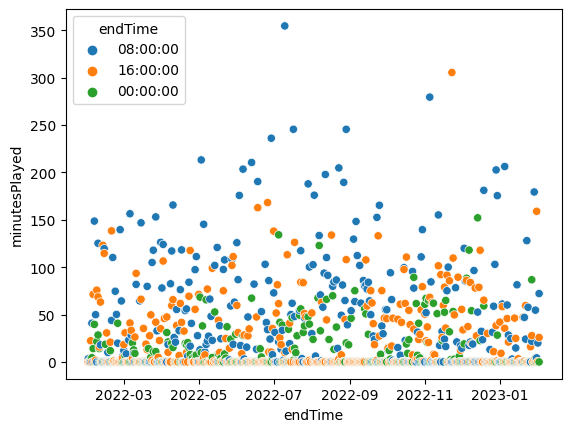

In [16]:
sns.scatterplot(data=timeframe_listening,x=timeframe_listening.endTime.dt.date,y="minutesPlayed",hue=timeframe_listening.endTime.dt.time)

The moment of the day when I listened Spotify the most was between 00:00-08:00, followed by the timeframe between 08:00-16:00. Meaning I diminish the audio streaming use over time in the day.

### Tracks analysis over time

In [71]:
timeframe_listening_tracks = historical_data[historical_data['typeObject']=='Track'].resample("8H").agg({"minutesPlayed":"sum"})
timeframe_listening_tracks = timeframe_listening_tracks.reset_index()
timeframe_listening_tracks

,endTime,minutesPlayed
0,2022-01-31 08:00:00,3.213383
1,2022-01-31 16:00:00,0.000000
2,2022-02-01 00:00:00,0.000000
3,2022-02-01 08:00:00,0.000000
4,2022-02-01 16:00:00,0.000000
...,...,...
1098,2023-02-01 08:00:00,19.995733
1099,2023-02-01 16:00:00,0.497067
1100,2023-02-02 00:00:00,0.000000
1101,2023-02-02 08:00:00,30.414450


In [87]:
timeframe_listening_tracks['time'] = timeframe_listening_tracks['endTime'].dt.hour
timeframe_listening_tracks_count= timeframe_listening_tracks.groupby("time").agg(total_minutes_played=("minutesPlayed","sum"))
timeframe_listening_tracks_count.sort_values(by="total_minutes_played",ascending=False)

,total_minutes_played
time,
8,7814.08150
16,3887.23120
0,1832.17965


<AxesSubplot:xlabel='endTime', ylabel='minutesPlayed'>

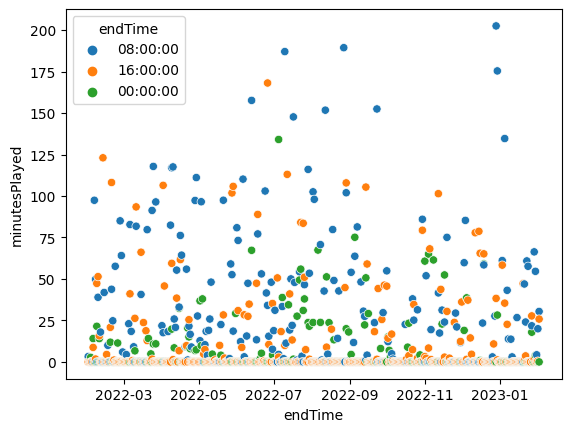

In [72]:
sns.scatterplot(data=timeframe_listening_tracks,x=timeframe_listening_tracks.endTime.dt.date,y="minutesPlayed",hue=timeframe_listening_tracks.endTime.dt.time)

In [79]:
px.scatter(timeframe_listening_tracks,x=timeframe_listening_tracks.endTime.dt.date,y="minutesPlayed",color=timeframe_listening_tracks.endTime.dt.time)

Although it's not easy to determine which timeframe I listened to tracks during more time, It's easily noticiable it's not between 16:00-00:00h.

### Podcast analysis over time

In [74]:
timeframe_listening_podcast = historical_data[historical_data['typeObject']=='Podcast'].resample("8H").agg({"minutesPlayed":"sum"})
timeframe_listening_podcast = timeframe_listening_podcast.reset_index()
timeframe_listening_podcast

,endTime,minutesPlayed
0,2022-02-02 16:00:00,22.323167
1,2022-02-03 00:00:00,4.453167
2,2022-02-03 08:00:00,40.811467
3,2022-02-03 16:00:00,0.000000
4,2022-02-04 00:00:00,0.000000
...,...,...
1090,2023-02-01 00:00:00,0.000000
1091,2023-02-01 08:00:00,0.000000
1092,2023-02-01 16:00:00,0.000000
1093,2023-02-02 00:00:00,0.000000


In [88]:
timeframe_listening_podcast['time'] = timeframe_listening_podcast['endTime'].dt.hour
timeframe_listening_podcast_count= timeframe_listening_podcast.groupby("time").agg(total_minutes_played=("minutesPlayed","sum"))
timeframe_listening_podcast_count.sort_values(by="total_minutes_played",ascending=False)

,total_minutes_played
time,
8,8333.505817
16,5185.307583
0,2076.241050


<AxesSubplot:xlabel='endTime', ylabel='minutesPlayed'>

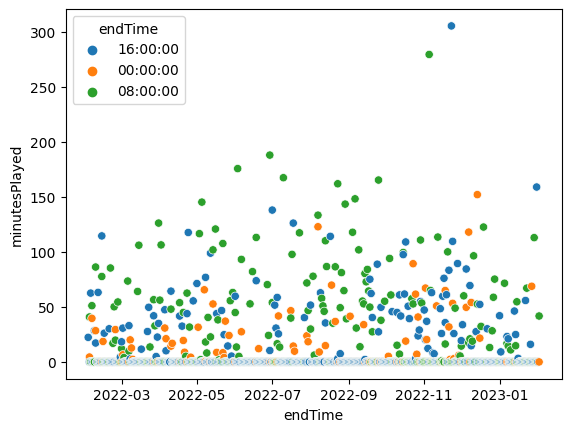

In [75]:
sns.scatterplot(data=timeframe_listening_podcast,x=timeframe_listening_podcast.endTime.dt.date,y="minutesPlayed",hue=timeframe_listening_podcast.endTime.dt.time)

In [80]:
px.scatter(timeframe_listening_podcast,x=timeframe_listening_podcast.endTime.dt.date,y="minutesPlayed",color=timeframe_listening_podcast.endTime.dt.time)

Same results as tracks. Also, in all the timeframes I listened more Podcast than tracks, following with the total graph.

# Tracks

## Analizing morning data

In [21]:
historical_data=historical_data.reset_index()
morning_time=historical_data[(historical_data['endTime'].dt.hour>=00) & (historical_data['endTime'].dt.hour<=7)]

In [22]:
morning_time_tracks=morning_time[morning_time['typeObject']=='Track']

In [23]:
morning_time_tracks

,index,endTime,artistName,trackName,msPlayed,typeObject,minutesPlayed,monthNumber,month
1,1,2022-02-02 06:27:00,Toña La Negra,Azul,164500,Track,2.741667,2,February
5,5,2022-02-04 06:29:00,Kim Wilde,Cambodia,236213,Track,3.936883,2,February
6,6,2022-02-04 06:32:00,Walls,Partirme la cara,190934,Track,3.182233,2,February
7,7,2022-02-04 06:35:00,Kygo,Gone Are The Days - Piano Jam 4,164209,Track,2.736817,2,February
8,8,2022-02-04 06:39:00,Don Omar,Guaya Guaya,4194,Track,0.069900,2,February
...,...,...,...,...,...,...,...,...,...
7357,7357,2023-01-27 07:53:00,Viva Suecia,No Hemos Aprendido Nada,231720,Track,3.862000,1,January
7358,7358,2023-01-27 07:57:00,Viva Suecia,Justo Cuando El Mundo Apriete,242853,Track,4.047550,1,January
7359,7359,2023-01-27 07:59:00,Viva Suecia,Hablar De Nada,127106,Track,2.118433,1,January
7494,7494,2023-01-30 07:05:00,Bebe,Respirar,4160,Track,0.069333,1,January


In [24]:
unique_morning_time_tracks= morning_time_tracks.groupby(["trackName","artistName"]).agg(total_minutes_played = ("minutesPlayed","sum"))

In [25]:
unique_morning_time_tracks=unique_morning_time_tracks.reset_index()

In [26]:
for i in range(len(unique_morning_time_tracks)):
    if unique_morning_time_tracks['trackName'].iloc[i]=="ASOT 1000 Los Angeles ID #002 (Mixed)":
        unique_morning_time_tracks['trackName'].iloc[i].replace("ASOT 1000 Los Angeles ID #002 (Mixed)","Turn The World Into A Dancefloor" )
    if unique_morning_time_tracks['artistName'].iloc[i]=="ID":
        unique_morning_time_tracks['artistName'].iloc[i].replace("ID","Armin van Buuren")

In [27]:
token = get_token()
list_tracks_id = ['0eO2zq5fjPt41BreFmiIKw']
for x in range(1,len(unique_morning_time_tracks['trackName'])):
        tracking_id= search_for_tracks(token,unique_morning_time_tracks['trackName'].iloc[x])
        list_tracks_id.append(tracking_id)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [29]:
unique_morning_time_tracks['track_id']=list_tracks_id

In [30]:
unique_morning_time_tracks

,trackName,artistName,total_minutes_played,track_id
0,#1,Imagine Dragons,3.417333,0eO2zq5fjPt41BreFmiIKw
1,(Don't Fight It) Feel It - AronChupa Edit [La ...,AronChupa,0.032000,45EGyXrLv4c63yjiaWMAid
2,(What A) Wonderful World - Mono,Sam Cooke,0.149167,2G0GextMwZJLkNxcSZ7ZJ3
3,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofía Reyes,3.369750,4QtiVmuA88tPQiCOHZuQ5b
4,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,1.638267,0YbKNvAu6wHeM4bfRTZFT3
...,...,...,...,...
752,solo x ti,Pol Granch,6.625267,5DhPx1cy248eVvTBoTVrrB
753,traitor,Olivia Rodrigo,1.501150,6kUaTA1J6L072MTUVERKQ0
754,up at night (feat. justin bieber),Kehlani,0.519000,4WghJOMjDpGdlk3b8aJIgy
755,¿Y Qué Tal Si Funciona?,Yuridia,0.554833,3gHn8eZRKss5cD4r3k3jCA


In [31]:
potential_df=[]
for t in range(len(unique_morning_time_tracks)):
    dictionary=get_features_by_song(token,unique_morning_time_tracks['track_id'].iloc[t])
    potential_df.append(dictionary)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [32]:
unique_morning_time_tracks['features']=potential_df

In [33]:
unique_morning_time_tracks

,trackName,artistName,total_minutes_played,track_id,features
0,#1,Imagine Dragons,3.417333,0eO2zq5fjPt41BreFmiIKw,"{'danceability': 0.692, 'energy': 0.695, 'key'..."
1,(Don't Fight It) Feel It - AronChupa Edit [La ...,AronChupa,0.032000,45EGyXrLv4c63yjiaWMAid,"{'danceability': 0.667, 'energy': 0.823, 'key'..."
2,(What A) Wonderful World - Mono,Sam Cooke,0.149167,2G0GextMwZJLkNxcSZ7ZJ3,"{'danceability': 0.686, 'energy': 0.672, 'key'..."
3,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofía Reyes,3.369750,4QtiVmuA88tPQiCOHZuQ5b,"{'danceability': 0.792, 'energy': 0.895, 'key'..."
4,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,1.638267,0YbKNvAu6wHeM4bfRTZFT3,"{'danceability': 0.425, 'energy': 0.948, 'key'..."
...,...,...,...,...,...
752,solo x ti,Pol Granch,6.625267,5DhPx1cy248eVvTBoTVrrB,"{'danceability': 0.793, 'energy': 0.633, 'key'..."
753,traitor,Olivia Rodrigo,1.501150,6kUaTA1J6L072MTUVERKQ0,"{'danceability': 0.38, 'energy': 0.339, 'key':..."
754,up at night (feat. justin bieber),Kehlani,0.519000,4WghJOMjDpGdlk3b8aJIgy,"{'danceability': 0.563, 'energy': 0.756, 'key'..."
755,¿Y Qué Tal Si Funciona?,Yuridia,0.554833,3gHn8eZRKss5cD4r3k3jCA,"{'danceability': 0.669, 'energy': 0.497, 'key'..."


In [34]:
unique_morning_time_tracks_features =pd.concat((unique_morning_time_tracks,unique_morning_time_tracks['features'].apply(pd.Series)),axis=1).drop(columns=['features','type','id','uri','track_href','analysis_url','error'])

In [35]:
unique_morning_time_tracks_features.head()

,trackName,artistName,total_minutes_played,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,#1,Imagine Dragons,3.417333,0eO2zq5fjPt41BreFmiIKw,0.692,0.695,1.0,-4.448,1.0,0.1090,0.0897,0.000000,0.1550,0.634,92.980,205041.0,4.0
1,(Don't Fight It) Feel It - AronChupa Edit [La ...,AronChupa,0.032000,45EGyXrLv4c63yjiaWMAid,0.667,0.823,0.0,-5.203,1.0,0.1130,0.3270,0.000000,0.2250,0.656,110.120,157091.0,4.0
2,(What A) Wonderful World - Mono,Sam Cooke,0.149167,2G0GextMwZJLkNxcSZ7ZJ3,0.686,0.672,11.0,-5.523,1.0,0.0323,0.7000,0.000000,0.1350,0.857,128.550,128787.0,4.0
3,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofía Reyes,3.369750,4QtiVmuA88tPQiCOHZuQ5b,0.792,0.895,1.0,-3.112,0.0,0.0589,0.1650,0.000000,0.0501,0.794,94.968,201526.0,4.0
4,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,1.638267,0YbKNvAu6wHeM4bfRTZFT3,0.425,0.948,11.0,-2.476,1.0,0.1980,0.0244,0.000001,0.1220,0.524,165.922,257349.0,4.0


## Analizing evening data

In [89]:
historical_data=historical_data.reset_index()
evening_time=historical_data[(historical_data['endTime'].dt.hour>=8) & (historical_data['endTime'].dt.hour<=15)]
evening_time.head()

,endTime,level_0,index,artistName,trackName,msPlayed,typeObject,minutesPlayed,monthNumber,month
0,2022-01-31 13:13:00,0,0,La Habitación Roja,No Estuviste Allí,192803,Track,3.213383,1,January
4,2022-02-03 12:31:00,4,4,Estirando el chicle,ELIGE TUS BATALLAS con SARA SÁLAMO | Estirando...,2448688,Podcast,40.811467,2,February
59,2022-02-05 08:10:00,59,59,kaizen con Jaime Rodríguez de Santiago,"#19 Finanzas Personales: movimiento FIRE, apre...",737111,Podcast,12.285183,2,February
60,2022-02-05 08:27:00,60,60,kaizen con Jaime Rodríguez de Santiago,"#20 Sesgos Cognitivos (II): ""Manolete, si no s...",1032843,Podcast,17.214050,2,February
61,2022-02-05 08:38:00,61,61,kaizen con Jaime Rodríguez de Santiago,"#21 Toma de decisiones (I): Walter White, conc...",649795,Podcast,10.829917,2,February


In [91]:
evening_time_tracks=evening_time[evening_time['typeObject']=='Track']
evening_time_tracks.head()

,endTime,level_0,index,artistName,trackName,msPlayed,typeObject,minutesPlayed,monthNumber,month
0,2022-01-31 13:13:00,0,0,La Habitación Roja,No Estuviste Allí,192803,Track,3.213383,1,January
63,2022-02-05 09:34:00,63,63,Impalah,Let's Get Lost,5921,Track,0.098683,2,February
64,2022-02-05 09:34:00,64,64,Danny Avila,Unlearn To Love (feat. madugo),70031,Track,1.167183,2,February
65,2022-02-05 09:34:00,65,65,Eros,Something Know,9845,Track,0.164083,2,February
66,2022-02-05 09:35:00,66,66,R3HAB,Runaway (with Sigala & JP Cooper),36548,Track,0.609133,2,February


In [92]:
unique_evening_time_tracks = evening_time_tracks.groupby(["trackName","artistName"]).agg(total_minutes_played = ("minutesPlayed","sum"))
unique_evening_time_tracks=unique_evening_time_tracks.reset_index()
unique_evening_time_tracks

,trackName,artistName,total_minutes_played
0,"""mierda de temas.""",Floridablanca,0.024367
1,%,Hens,0.024533
2,(You Make Me Feel Like) A Natural Woman,Aretha Franklin,2.755550
3,+,Aitana,0.016350
4,1 Vez X Semana,Diego Ojeda,3.829983
...,...,...,...
2591,ÉRAMOS DOS,Enol,7.554217
2592,Échame La Culpa,Luis Fonsi,0.183433
2593,Éxtasis,Manuel Turizo,0.837500
2594,Índigo,Camilo,3.575100


In [93]:
token = get_token()
list_tracks_id = []
for x in range(len(unique_evening_time_tracks['trackName'])):
        tracking_id= search_for_tracks(token,unique_evening_time_tracks['trackName'].iloc[x])
        list_tracks_id.append(tracking_id)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [94]:
unique_evening_time_tracks['track_id']=list_tracks_id
unique_evening_time_tracks

,trackName,artistName,total_minutes_played,track_id
0,"""mierda de temas.""",Floridablanca,0.024367,3lpD9NFviOWdFS9s9GjBTt
1,%,Hens,0.024533,0HRVOW42zn1Sn3HU0IFWyN
2,(You Make Me Feel Like) A Natural Woman,Aretha Franklin,2.755550,5K09WxKdlkroDyEVyOSySy
3,+,Aitana,0.016350,None
4,1 Vez X Semana,Diego Ojeda,3.829983,3AjG8l7BlDkmifEYjWt2zd
...,...,...,...,...
2591,ÉRAMOS DOS,Enol,7.554217,3otxqaLl04PmaRD4zmOJeO
2592,Échame La Culpa,Luis Fonsi,0.183433,0mlAOSILGRys2IbvyOT5VJ
2593,Éxtasis,Manuel Turizo,0.837500,2X8AGLwb9F0JzJ9zT27a22
2594,Índigo,Camilo,3.575100,4knc1Fp3kbuq8bH2byOvLu


In [95]:
potential_df=[]
for t in range(len(unique_evening_time_tracks)):
    dictionary=get_features_by_song(token,unique_evening_time_tracks['track_id'].iloc[t])
    potential_df.append(dictionary)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [96]:
unique_evening_time_tracks['features']=potential_df
unique_evening_time_tracks.head()

,trackName,artistName,total_minutes_played,track_id,features
0,"""mierda de temas.""",Floridablanca,0.024367,3lpD9NFviOWdFS9s9GjBTt,"{'danceability': 0.686, 'energy': 0.727, 'key'..."
1,%,Hens,0.024533,0HRVOW42zn1Sn3HU0IFWyN,"{'danceability': 0.773, 'energy': 0.491, 'key'..."
2,(You Make Me Feel Like) A Natural Woman,Aretha Franklin,2.755550,5K09WxKdlkroDyEVyOSySy,"{'danceability': 0.603, 'energy': 0.271, 'key'..."
3,+,Aitana,0.016350,None,"{'error': {'status': 400, 'message': 'invalid ..."
4,1 Vez X Semana,Diego Ojeda,3.829983,3AjG8l7BlDkmifEYjWt2zd,"{'danceability': 0.709, 'energy': 0.39, 'key':..."


In [97]:
unique_evening_time_tracks_features= pd.concat((unique_evening_time_tracks,unique_evening_time_tracks['features'].apply(pd.Series)),axis=1).drop(columns=['features','type','id','uri','track_href','analysis_url','error'])

In [98]:
unique_evening_time_tracks_features

,trackName,artistName,total_minutes_played,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,"""mierda de temas.""",Floridablanca,0.024367,3lpD9NFviOWdFS9s9GjBTt,0.686,0.727,9.0,-5.810,1.0,0.0535,0.06420,0.00000,0.194,0.686,113.003,243844.0,4.0
1,%,Hens,0.024533,0HRVOW42zn1Sn3HU0IFWyN,0.773,0.491,7.0,-8.190,1.0,0.0441,0.82800,0.00000,0.226,0.907,105.057,125571.0,4.0
2,(You Make Me Feel Like) A Natural Woman,Aretha Franklin,2.755550,5K09WxKdlkroDyEVyOSySy,0.603,0.271,5.0,-10.083,1.0,0.0284,0.67900,0.00000,0.141,0.405,110.890,165333.0,3.0
3,+,Aitana,0.016350,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 Vez X Semana,Diego Ojeda,3.829983,3AjG8l7BlDkmifEYjWt2zd,0.709,0.390,2.0,-10.962,1.0,0.2200,0.49200,0.00000,0.120,0.373,86.011,229799.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,ÉRAMOS DOS,Enol,7.554217,3otxqaLl04PmaRD4zmOJeO,0.702,0.742,7.0,-3.894,1.0,0.1770,0.15100,0.00000,0.112,0.587,89.923,174426.0,4.0
2592,Échame La Culpa,Luis Fonsi,0.183433,0mlAOSILGRys2IbvyOT5VJ,0.733,0.897,0.0,-3.652,1.0,0.0389,0.03910,0.00000,0.117,0.649,96.006,173800.0,4.0
2593,Éxtasis,Manuel Turizo,0.837500,2X8AGLwb9F0JzJ9zT27a22,0.829,0.747,7.0,-3.511,1.0,0.1490,0.27600,0.00000,0.339,0.576,98.030,191607.0,4.0
2594,Índigo,Camilo,3.575100,4knc1Fp3kbuq8bH2byOvLu,0.748,0.779,0.0,-6.659,1.0,0.0342,0.00884,0.00004,0.113,0.928,128.910,214933.0,4.0


## Analizing night data

In [39]:
historical_data=historical_data.reset_index()
night_time=historical_data[historical_data['endTime'].dt.hour>=16]
night_time.head()

,level_0,index,endTime,artistName,trackName,msPlayed,typeObject,minutesPlayed,monthNumber,month
2,2,2,2022-02-02 16:58:00,Deforme Semanal Ideal Total,La juventud,1339390,Podcast,22.323167,2,February
11,11,11,2022-02-04 18:47:00,Walk Off the Earth,The Mushroom Song,3605,Track,0.060083,2,February
12,12,12,2022-02-04 18:47:00,R3HAB,Most People (with Lukas Graham) - Dubdogz Remix,4991,Track,0.083183,2,February
13,13,13,2022-02-04 18:47:00,Miss Caffeina,Fuerte el aplauso,4373,Track,0.072883,2,February
14,14,14,2022-02-04 18:48:00,8D Tunes,Hate Me (8D Audio),874,Track,0.014567,2,February


In [40]:
night_time_tracks=night_time[night_time['typeObject']=='Track']
night_time_tracks.head()

,level_0,index,endTime,artistName,trackName,msPlayed,typeObject,minutesPlayed,monthNumber,month
11,11,11,2022-02-04 18:47:00,Walk Off the Earth,The Mushroom Song,3605,Track,0.060083,2,February
12,12,12,2022-02-04 18:47:00,R3HAB,Most People (with Lukas Graham) - Dubdogz Remix,4991,Track,0.083183,2,February
13,13,13,2022-02-04 18:47:00,Miss Caffeina,Fuerte el aplauso,4373,Track,0.072883,2,February
14,14,14,2022-02-04 18:48:00,8D Tunes,Hate Me (8D Audio),874,Track,0.014567,2,February
15,15,15,2022-02-04 18:48:00,Sorana,redruM - MistaJam Remix,3626,Track,0.060433,2,February


In [41]:
unique_night_time_tracks = night_time_tracks.groupby(["trackName","artistName"]).agg(total_minutes_played = ("minutesPlayed","sum"))
unique_night_time_tracks=unique_night_time_tracks.reset_index()
unique_night_time_tracks
# More variety of song than in the morning.

,trackName,artistName,total_minutes_played
0,%,Hens,2.092850
1,(no) te has ido,IPANEMA,0.099550
2,+,Aitana,0.037500
3,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,0.016250
4,180 Grados,Sidecars,8.644517
...,...,...,...
1443,¿Y Qué Tal Si Funciona?,Yuridia,3.142400
1444,Ácido,Miss Caffeina,0.014833
1445,ÉRAMOS DOS,Enol,2.675150
1446,Échame La Culpa,Luis Fonsi,0.028250


In [42]:
token = get_token()
list_tracks_id = []
for x in range(len(unique_night_time_tracks['trackName'])):
        tracking_id= search_for_tracks(token,unique_night_time_tracks['trackName'].iloc[x])
        list_tracks_id.append(tracking_id)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [44]:
unique_night_time_tracks['track_id']=list_tracks_id
unique_night_time_tracks

,trackName,artistName,total_minutes_played,track_id
0,%,Hens,2.092850,0HRVOW42zn1Sn3HU0IFWyN
1,(no) te has ido,IPANEMA,0.099550,5XJIXRAM4ivaOitRM4NuE4
2,+,Aitana,0.037500,None
3,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,0.016250,0YbKNvAu6wHeM4bfRTZFT3
4,180 Grados,Sidecars,8.644517,4LbYEer1th0EbWPsvGqe0e
...,...,...,...,...
1443,¿Y Qué Tal Si Funciona?,Yuridia,3.142400,3gHn8eZRKss5cD4r3k3jCA
1444,Ácido,Miss Caffeina,0.014833,67qxV0lxSgs8BAnIl3gtEL
1445,ÉRAMOS DOS,Enol,2.675150,3otxqaLl04PmaRD4zmOJeO
1446,Échame La Culpa,Luis Fonsi,0.028250,0mlAOSILGRys2IbvyOT5VJ


In [45]:
potential_df=[]
for t in range(len(unique_night_time_tracks)):
    dictionary=get_features_by_song(token,unique_night_time_tracks['track_id'].iloc[t])
    potential_df.append(dictionary)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [46]:
unique_night_time_tracks['features']=potential_df
unique_night_time_tracks.head()

,trackName,artistName,total_minutes_played,track_id,features
0,%,Hens,2.092850,0HRVOW42zn1Sn3HU0IFWyN,"{'danceability': 0.773, 'energy': 0.491, 'key'..."
1,(no) te has ido,IPANEMA,0.099550,5XJIXRAM4ivaOitRM4NuE4,"{'danceability': 0.488, 'energy': 0.807, 'key'..."
2,+,Aitana,0.037500,None,"{'error': {'status': 400, 'message': 'invalid ..."
3,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,0.016250,0YbKNvAu6wHeM4bfRTZFT3,"{'danceability': 0.425, 'energy': 0.948, 'key'..."
4,180 Grados,Sidecars,8.644517,4LbYEer1th0EbWPsvGqe0e,"{'danceability': 0.672, 'energy': 0.839, 'key'..."


In [47]:
unique_night_time_tracks_features = pd.concat((unique_night_time_tracks,unique_night_time_tracks['features'].apply(pd.Series)),axis=1).drop(columns=['features','type','id','uri','track_href','analysis_url','error'])

In [48]:
unique_night_time_tracks_features

,trackName,artistName,total_minutes_played,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,%,Hens,2.092850,0HRVOW42zn1Sn3HU0IFWyN,0.773,0.491,7.0,-8.190,1.0,0.0441,0.8280,0.000000,0.2260,0.907,105.057,125571.0,4.0
1,(no) te has ido,IPANEMA,0.099550,5XJIXRAM4ivaOitRM4NuE4,0.488,0.807,9.0,-3.817,1.0,0.0873,0.0261,0.000000,0.0919,0.230,75.290,210727.0,4.0
2,+,Aitana,0.037500,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,0.016250,0YbKNvAu6wHeM4bfRTZFT3,0.425,0.948,11.0,-2.476,1.0,0.1980,0.0244,0.000001,0.1220,0.524,165.922,257349.0,4.0
4,180 Grados,Sidecars,8.644517,4LbYEer1th0EbWPsvGqe0e,0.672,0.839,7.0,-5.292,1.0,0.0277,0.0606,0.000040,0.1120,0.603,126.970,241044.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,¿Y Qué Tal Si Funciona?,Yuridia,3.142400,3gHn8eZRKss5cD4r3k3jCA,0.669,0.497,5.0,-5.480,1.0,0.0327,0.6210,0.000000,0.1030,0.701,130.992,185038.0,4.0
1444,Ácido,Miss Caffeina,0.014833,67qxV0lxSgs8BAnIl3gtEL,0.793,0.749,1.0,-5.209,1.0,0.1820,0.0260,0.001980,0.0433,0.676,101.000,149143.0,4.0
1445,ÉRAMOS DOS,Enol,2.675150,3otxqaLl04PmaRD4zmOJeO,0.702,0.742,7.0,-3.894,1.0,0.1770,0.1510,0.000000,0.1120,0.587,89.923,174426.0,4.0
1446,Échame La Culpa,Luis Fonsi,0.028250,0mlAOSILGRys2IbvyOT5VJ,0.733,0.897,0.0,-3.652,1.0,0.0389,0.0391,0.000000,0.1170,0.649,96.006,173800.0,4.0


In [99]:
# unique_night_time_tracks_features.to_csv("unique_night_time_tracks_features.csv")
# unique_morning_time_tracks_features.to_csv("unique_morning_time_tracks_features.csv")
# unique_evening_time_tracks_features.to_csv("unique_evening_time_tracks_features.csv")

In [54]:
# unique_morning_time_tracks_features=pd.read_csv("/Users/monic/code/monicasainer/Spotify/Spotify/raw_data/unique_morning_time_tracks_features.csv")
# unique_night_time_tracks_features=pd.read_csv("/Users/monic/code/monicasainer/Spotify/Spotify/raw_data/unique_night_time_tracks_features.csv")

In [100]:
unique_morning_time_tracks_features = unique_morning_time_tracks_features.dropna()
unique_evening_time_tracks_features = unique_evening_time_tracks_features.dropna()
unique_night_time_tracks_features = unique_night_time_tracks_features.dropna()

# Compairson across timeframes

## All tracks

In [111]:
skim(unique_morning_time_tracks_features)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 755    │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0       ┃ p25     ┃ p75      ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ total_minutes_played    │   0 │     0 │     2.4 │    2.3 │        0 │     0.3 │      3.5 │     16 │  █▇▁   │  │
│ │ danceability            │   0 │     0 │    0.63 │   0.15 │    0.085 │    0.54 │     0.75 │   0.96 │  ▁▄██▂ │  │
│ │ energy                  │   0 │     0 │    0.64 │   0.21 │   0.0037 │    0.53 │      0.8 │   0.99 │ ▁▂▃▅█▅ │  │
│ │ key                     │   0 │     0 │     5.5 │    3.7 │        0 │       2 │        9 │     11 │ █▄▆▆▆▆ │  │
│ │ loudness                │   0 │     0 │      -7 │    4.1 │      -31 │    -7.7 │     -4.7 │   -1.2 │    ▁▅█ │  │
│ │ mode                    │   0 │     0 │    0.63 │   0.48 │        0 │       0 │        1 │      1 │ ▅    █ │  │
│ │ speechiness             │   0 │     0 │   0.082 │  0.078 │    0.022 │   0.037 │    0.092 │   0.59 │   █▁   │  │
│ │ acousticness            │   0 │     0 │    0.29 │   0.29 │  9.7e-06 │   0.053 │     0.48 │      1 │ █▃▂▂▁▁ │  │
│ │ instrumentalness        │   0 │     0 │   0.064 │   0.21 │        0 │       0 │  0.00029 │   0.98 │   █    │  │
│ │ liveness                │   0 │     0 │    0.18 │   0.15 │     0.03 │   0.094 │     0.23 │   0.97 │  █▂▁   │  │
│ │ valence                 │   0 │     0 │    0.52 │   0.24 │    0.032 │    0.32 │     0.71 │   0.98 │ ▄▆▇█▇▄ │  │
│ │ tempo                   │   0 │     0 │     120 │     29 │       45 │      98 │      140 │    210 │  ▆█▆▃▁ │  │
│ │ duration_ms             │   0 │     0 │  200000 │  45000 │    45000 │  170000 │   220000 │ 410000 │   ▂█▃  │  │
│ │ time_signature          │   0 │     0 │       4 │    0.3 │        1 │       4 │        4 │      5 │     █  │  │
│ └─────────────────────────┴─────┴───────┴─────────┴────────┴──────────┴─────────┴──────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ trackName                 │       0 │          0 │                          3.2 │                     2400 │  │
│ │ artistName                │       0 │          0 │                          3.2 │                     2400 │  │
│ │ track_id                  │       0 │          0 │                          3.2 │                     2400 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [112]:
skim(unique_evening_time_tracks_features)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2595   │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0       ┃ p25     ┃ p75      ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ total_minutes_played    │   0 │     0 │       3 │    4.2 │        0 │     0.2 │      3.6 │     59 │   █    │  │
│ │ danceability            │   0 │     0 │    0.63 │   0.16 │        0 │    0.53 │     0.74 │   0.97 │  ▁▃▇█▂ │  │
│ │ energy                  │   0 │     0 │    0.62 │   0.24 │  0.00025 │    0.49 │      0.8 │      1 │ ▂▂▃▅█▄ │  │
│ │ key                     │   0 │     0 │     5.4 │    3.6 │        0 │       2 │        9 │     11 │ █▅▆▇▆▆ │  │
│ │ loudness                │   0 │     0 │    -7.9 │    5.8 │      -48 │    -8.4 │     -4.7 │ -0.091 │     ▂█ │  │
│ │ mode                    │   0 │     0 │    0.64 │   0.48 │        0 │       0 │        1 │      1 │ ▅    █ │  │
│ │ speechiness             │   0 │     0 │   0.083 │   0.08 │        0 │   0.038 │    0.091 │   0.94 │   █▁   │  │
│ │ acousticness            │   0 │     0 │    0.32 │   0.31 │  1.1e-06 │   0.054 │     0.54 │      1 │ █▃▂▂▁▂ │  │
│ │ instrumentalness        │   0 │     0 │    0.11 │   0.28 │        0 │       0 │  0.00094 │      1 │ █    ▁ │  │
│ │ liveness                │   0 │     0 │    0.17 │   0.14 │    0.015 │   0.095 │     0.21 │   0.97 │  █▂▁   │  │
│ │ valence                 │   0 │     0 │    0.51 │   0.24 │        0 │    0.32 │      0.7 │   0.98 │ ▃▆▇█▇▄ │  │
│ │ tempo                   │   0 │     0 │     120 │     30 │        0 │      98 │      140 │    230 │  ▁▇█▃  │  │
│ │ duration_ms             │   0 │     0 │  200000 │  51000 │    33000 │  170000 │   230000 │ 620000 │  ▁█▃   │  │
│ │ time_signature          │   0 │     0 │     3.9 │   0.39 │        0 │       4 │        4 │      5 │    ▁█  │  │
│ └─────────────────────────┴─────┴───────┴─────────┴────────┴──────────┴─────────┴──────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ trackName                 │       0 │          0 │                          3.1 │                     8100 │  │
│ │ artistName                │       0 │          0 │                          3.1 │                     8100 │  │
│ │ track_id                  │       0 │          0 │                          3.1 │                     8100 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [113]:
skim(unique_night_time_tracks_features)
# pd.DataFrame(unique_night_time_tracks_features.mean(),columns=['mean_night']).T

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1447   │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ total_minutes_played     │   0 │     0 │     2.7 │    3.1 │      0 │    0.22 │      3.6 │      44 │   █    │  │
│ │ danceability             │   0 │     0 │    0.62 │   0.16 │  0.081 │    0.52 │     0.74 │    0.96 │  ▁▄██▂ │  │
│ │ energy                   │   0 │     0 │    0.63 │   0.23 │  0.001 │    0.51 │      0.8 │    0.99 │ ▁▁▃▅█▅ │  │
│ │ key                      │   0 │     0 │     5.2 │    3.6 │      0 │       2 │        8 │      11 │ █▅▆▆▅▆ │  │
│ │ loudness                 │   0 │     0 │    -7.5 │    5.5 │    -42 │    -8.1 │     -4.7 │    0.68 │     ▅█ │  │
│ │ mode                     │   0 │     0 │    0.67 │   0.47 │      0 │       0 │        1 │       1 │ ▄    █ │  │
│ │ speechiness              │   0 │     0 │   0.083 │  0.078 │  0.022 │   0.038 │    0.091 │    0.58 │  █▁▁   │  │
│ │ acousticness             │   0 │     0 │    0.32 │   0.31 │  1e-05 │   0.058 │     0.54 │       1 │ █▃▂▂▁▂ │  │
│ │ instrumentalness         │   0 │     0 │   0.083 │   0.24 │      0 │       0 │  0.00062 │    0.99 │ █    ▁ │  │
│ │ liveness                 │   0 │     0 │    0.18 │   0.15 │  0.018 │   0.095 │     0.21 │    0.97 │  █▂▁   │  │
│ │ valence                  │   0 │     0 │    0.52 │   0.24 │  0.024 │    0.32 │     0.72 │    0.98 │ ▄▇██▇▅ │  │
│ │ tempo                    │   0 │     0 │     120 │     29 │     51 │      97 │      140 │     220 │ ▁▇█▄▂  │  │
│ │ duration_ms              │   0 │     0 │  210000 │  51000 │  61000 │  180000 │   230000 │  720000 │  ▂█▁   │  │
│ │ time_signature           │   0 │     0 │     3.9 │   0.39 │      1 │       4 │        4 │       5 │    ▁█  │  │
│ └──────────────────────────┴─────┴───────┴─────────┴────────┴────────┴─────────┴──────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ trackName                 │       0 │          0 │                          3.2 │                     4600 │  │
│ │ artistName                │       0 │          0 │                          3.2 │                     4600 │  │
│ │ track_id                  │       0 │          0 │                          3.2 │                     4600 │  │
│ └───────────────────────────┴─────────┴────────────┴──

All the values tend to be similiar in all timeframes.
> Between 08:00-16:00 the energy of the songs trend to be reduced by 2 pp points from the morning timeframe.
>
> Also, the instrumentalness increases by 4 pp.

## Top 100 tracks

In [58]:
unique_morning_time_tracks_features

,trackName,artistName,total_minutes_played,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,#1,Imagine Dragons,3.417333,0eO2zq5fjPt41BreFmiIKw,0.692,0.695,1.0,-4.448,1.0,0.1090,0.0897,0.000000,0.1550,0.6340,92.980,205041.0,4.0
1,(Don't Fight It) Feel It - AronChupa Edit [La ...,AronChupa,0.032000,45EGyXrLv4c63yjiaWMAid,0.667,0.823,0.0,-5.203,1.0,0.1130,0.3270,0.000000,0.2250,0.6560,110.120,157091.0,4.0
2,(What A) Wonderful World - Mono,Sam Cooke,0.149167,2G0GextMwZJLkNxcSZ7ZJ3,0.686,0.672,11.0,-5.523,1.0,0.0323,0.7000,0.000000,0.1350,0.8570,128.550,128787.0,4.0
3,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofía Reyes,3.369750,4QtiVmuA88tPQiCOHZuQ5b,0.792,0.895,1.0,-3.112,0.0,0.0589,0.1650,0.000000,0.0501,0.7940,94.968,201526.0,4.0
4,11 Minutes (feat. Travis Barker) - Kayzo Remix,YUNGBLUD,1.638267,0YbKNvAu6wHeM4bfRTZFT3,0.425,0.948,11.0,-2.476,1.0,0.1980,0.0244,0.000001,0.1220,0.5240,165.922,257349.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,solo x ti,Pol Granch,6.625267,5DhPx1cy248eVvTBoTVrrB,0.793,0.633,11.0,-4.447,0.0,0.0381,0.2700,0.000016,0.1110,0.4980,118.005,198759.0,4.0
753,traitor,Olivia Rodrigo,1.501150,6kUaTA1J6L072MTUVERKQ0,0.380,0.339,3.0,-7.885,1.0,0.0338,0.6910,0.000000,0.1200,0.0849,100.607,229227.0,4.0
754,up at night (feat. justin bieber),Kehlani,0.519000,4WghJOMjDpGdlk3b8aJIgy,0.563,0.756,0.0,-3.852,0.0,0.0579,0.1960,0.000000,0.2450,0.2340,100.012,182227.0,4.0
755,¿Y Qué Tal Si Funciona?,Yuridia,0.554833,3gHn8eZRKss5cD4r3k3jCA,0.669,0.497,5.0,-5.480,1.0,0.0327,0.6210,0.000000,0.1030,0.7010,130.992,185038.0,4.0


In [60]:
top_100_morning_tracks = unique_morning_time_tracks_features.sort_values(by="total_minutes_played")[:100]
top_100_morning_tracks.describe()

,total_minutes_played,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,0.023804,0.619570,0.640873,5.81000,-7.288780,0.670000,0.077413,0.285697,0.043422,0.187404,0.535430,118.074350,206950.99000,4.000000
std,0.006341,0.135123,0.223735,3.55816,4.913647,0.472582,0.078907,0.285297,0.186343,0.155229,0.238994,26.206495,43326.33994,0.142134
min,0.000000,0.285000,0.003680,0.00000,-30.799000,0.000000,0.025000,0.000303,0.000000,0.030500,0.047700,74.504000,86400.00000,3.000000
25%,0.019883,0.531750,0.524250,2.75000,-7.714000,0.000000,0.034950,0.035450,0.000000,0.088125,0.322250,97.401000,184666.75000,4.000000
50%,0.022875,0.610000,0.687500,6.00000,-5.841000,1.000000,0.048450,0.164500,0.000002,0.125500,0.564000,116.870500,210270.50000,4.000000
75%,0.028104,0.724250,0.808750,9.00000,-4.876500,1.000000,0.087825,0.447000,0.000065,0.227250,0.718500,133.995750,233961.75000,4.000000
max,0.038033,0.947000,0.955000,11.00000,-1.879000,1.000000,0.481000,0.996000,0.969000,0.879000,0.965000,195.540000,348768.00000,5.000000


In [114]:
skim(top_100_morning_tracks)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100    │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p75      ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ total_minutes_played    │   0 │     0 │   0.024 │  0.0063 │       0 │    0.02 │    0.028 │  0.038 │   ▄█▅▂ │  │
│ │ danceability            │   0 │     0 │    0.62 │    0.14 │    0.28 │    0.53 │     0.72 │   0.95 │ ▁▄█▆▅▁ │  │
│ │ energy                  │   0 │     0 │    0.64 │    0.22 │  0.0037 │    0.52 │     0.81 │   0.95 │ ▁▁▃▄▇█ │  │
│ │ key                     │   0 │     0 │     5.8 │     3.6 │       0 │     2.8 │        9 │     11 │ █▃█▇██ │  │
│ │ loudness                │   0 │     0 │    -7.3 │     4.9 │     -31 │    -7.7 │     -4.9 │   -1.9 │    ▁▃█ │  │
│ │ mode                    │   0 │     0 │    0.67 │    0.47 │       0 │       0 │        1 │      1 │ ▄    █ │  │
│ │ speechiness             │   0 │     0 │   0.077 │   0.079 │   0.025 │   0.035 │    0.088 │   0.48 │   █▁   │  │
│ │ acousticness            │   0 │     0 │    0.29 │    0.29 │  0.0003 │   0.035 │     0.45 │      1 │ █▃▂▁▂▁ │  │
│ │ instrumentalness        │   0 │     0 │   0.043 │    0.19 │       0 │       0 │  6.5e-05 │   0.97 │   █    │  │
│ │ liveness                │   0 │     0 │    0.19 │    0.16 │    0.03 │   0.088 │     0.23 │   0.88 │  █▃▁   │  │
│ │ valence                 │   0 │     0 │    0.54 │    0.24 │   0.048 │    0.32 │     0.72 │   0.96 │ ▂█▅█▇▅ │  │
│ │ tempo                   │   0 │     0 │     120 │      26 │      75 │      97 │      130 │    200 │ ▄▆█▂▁▁ │  │
│ │ duration_ms             │   0 │     0 │  210000 │   43000 │   86000 │  180000 │   230000 │ 350000 │ ▁▃█▆▂  │  │
│ │ time_signature          │   0 │     0 │       4 │    0.14 │       3 │       4 │        4 │      5 │     █  │  │
│ └─────────────────────────┴─────┴───────┴─────────┴─────────┴─────────┴─────────┴──────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ trackName                 │       0 │          0 │                          3.2 │                      320 │  │
│ │ artistName                │       0 │          0 │                          3.2 │                      320 │  │
│ │ track_id                  │       0 │          0 │                          3.2 │                      320 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [102]:
top_100_evening_tracks = unique_evening_time_tracks_features.sort_values(by="total_minutes_played")[:100]
top_100_evening_tracks.describe()

,total_minutes_played,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.015641,0.607660,0.686042,5.040000,-6.605050,0.640000,0.088399,0.249092,0.043617,0.181036,0.522594,126.437420,216300.910000,3.890000
std,0.004800,0.151914,0.192524,3.805684,3.730376,0.482418,0.079676,0.272423,0.179985,0.126960,0.227460,28.560351,62960.367175,0.469149
min,0.000000,0.191000,0.058200,0.000000,-26.387000,0.000000,0.024400,0.000034,0.000000,0.042900,0.039200,64.934000,72193.000000,1.000000
25%,0.013758,0.525250,0.577250,1.000000,-7.332000,0.000000,0.040400,0.046300,0.000000,0.093950,0.369000,100.018500,185944.750000,4.000000
50%,0.016883,0.622000,0.738500,5.000000,-5.675500,1.000000,0.057950,0.124500,0.000005,0.127500,0.529500,125.967500,209762.000000,4.000000
75%,0.018950,0.722500,0.838500,9.000000,-4.531000,1.000000,0.112750,0.413500,0.000387,0.236500,0.691750,143.927750,237549.750000,4.000000
max,0.020500,0.922000,0.974000,11.000000,-1.797000,1.000000,0.467000,0.961000,0.956000,0.798000,0.964000,189.856000,622000.000000,4.000000


In [115]:
skim(top_100_evening_tracks)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100    │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ total_minutes_played    │   0 │     0 │   0.016 │  0.0048 │        0 │   0.014 │   0.019 │  0.021 │ ▁  ▂▄█ │  │
│ │ danceability            │   0 │     0 │    0.61 │    0.15 │     0.19 │    0.53 │    0.72 │   0.92 │ ▁▃▃█▄▂ │  │
│ │ energy                  │   0 │     0 │    0.69 │    0.19 │    0.058 │    0.58 │    0.84 │   0.97 │  ▁▂▄█▇ │  │
│ │ key                     │   0 │     0 │       5 │     3.8 │        0 │       1 │       9 │     11 │ █▄▄▃▅▅ │  │
│ │ loudness                │   0 │     0 │    -6.6 │     3.7 │      -26 │    -7.3 │    -4.5 │   -1.8 │    ▁▅█ │  │
│ │ mode                    │   0 │     0 │    0.64 │    0.48 │        0 │       0 │       1 │      1 │ ▅    █ │  │
│ │ speechiness             │   0 │     0 │   0.088 │    0.08 │    0.024 │    0.04 │    0.11 │   0.47 │  █▂▁   │  │
│ │ acousticness            │   0 │     0 │    0.25 │    0.27 │  3.4e-05 │   0.046 │    0.41 │   0.96 │ █▁▁▁▁▁ │  │
│ │ instrumentalness        │   0 │     0 │   0.044 │    0.18 │        0 │       0 │ 0.00039 │   0.96 │   █    │  │
│ │ liveness                │   0 │     0 │    0.18 │    0.13 │    0.043 │   0.094 │    0.24 │    0.8 │  █▃▁   │  │
│ │ valence                 │   0 │     0 │    0.52 │    0.23 │    0.039 │    0.37 │    0.69 │   0.96 │ ▄▄▆█▆▄ │  │
│ │ tempo                   │   0 │     0 │     130 │      29 │       65 │     100 │     140 │    190 │ ▁██▇▃▄ │  │
│ │ duration_ms             │   0 │     0 │  220000 │   63000 │    72000 │  190000 │  240000 │ 620000 │  ▁█▁   │  │
│ │ time_signature          │   0 │     0 │     3.9 │    0.47 │        1 │       4 │       4 │      4 │      █ │  │
│ └─────────────────────────┴─────┴───────┴─────────┴─────────┴──────────┴─────────┴─────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ trackName                 │       0 │          0 │                            3 │                      300 │  │
│ │ artistName                │       0 │          0 │                            3 │                      300 │  │
│ │ track_id                  │       0 │          0 │                            3 │                      300 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [61]:
top_100_night_tracks = unique_night_time_tracks_features.sort_values(by="total_minutes_played")[:100]
top_100_night_tracks.describe()

,total_minutes_played,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.013803,0.639440,0.705676,5.530000,-6.179240,0.600000,0.077312,0.279929,0.064215,0.172771,0.577922,119.088410,211920.150000,3.940000
std,0.005473,0.142248,0.212221,3.677546,3.559849,0.492366,0.069911,0.285792,0.210795,0.121122,0.254236,28.196434,52207.686743,0.277798
min,0.000000,0.161000,0.026500,0.000000,-29.794000,0.000000,0.025700,0.000064,0.000000,0.043300,0.037000,64.934000,64679.000000,3.000000
25%,0.011883,0.580000,0.585250,2.000000,-7.511000,0.000000,0.037675,0.047150,0.000000,0.100750,0.356250,97.740000,183836.500000,4.000000
50%,0.015850,0.639500,0.756500,6.000000,-5.669000,1.000000,0.050850,0.157500,0.000004,0.128000,0.587000,119.987500,206713.500000,4.000000
75%,0.017542,0.724250,0.872000,9.000000,-4.203000,1.000000,0.085225,0.435750,0.000866,0.200500,0.793000,132.327500,233078.500000,4.000000
max,0.020117,0.892000,0.989000,11.000000,-0.390000,1.000000,0.485000,0.980000,0.955000,0.681000,0.960000,201.021000,388267.000000,5.000000


In [116]:
skim(top_100_night_tracks)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100    │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ total_minutes_played    │   0 │     0 │   0.014 │  0.0055 │        0 │   0.012 │   0.018 │   0.02 │ ▂▁▁▃██ │  │
│ │ danceability            │   0 │     0 │    0.64 │    0.14 │     0.16 │    0.58 │    0.72 │   0.89 │ ▁ ▂█▆▄ │  │
│ │ energy                  │   0 │     0 │    0.71 │    0.21 │    0.026 │    0.59 │    0.87 │   0.99 │  ▁▂▄▆█ │  │
│ │ key                     │   0 │     0 │     5.5 │     3.7 │        0 │       2 │       9 │     11 │ █▄▆▇▇▆ │  │
│ │ loudness                │   0 │     0 │    -6.2 │     3.6 │      -30 │    -7.5 │    -4.2 │  -0.39 │    ▁█▇ │  │
│ │ mode                    │   0 │     0 │     0.6 │    0.49 │        0 │       0 │       1 │      1 │ ▅    █ │  │
│ │ speechiness             │   0 │     0 │   0.077 │    0.07 │    0.026 │   0.038 │   0.085 │   0.48 │  █▁▁   │  │
│ │ acousticness            │   0 │     0 │    0.28 │    0.29 │  6.4e-05 │   0.047 │    0.44 │   0.98 │ █▃▂▁▁▁ │  │
│ │ instrumentalness        │   0 │     0 │   0.064 │    0.21 │        0 │       0 │ 0.00087 │   0.95 │   █    │  │
│ │ liveness                │   0 │     0 │    0.17 │    0.12 │    0.043 │     0.1 │     0.2 │   0.68 │  █▃▁▁  │  │
│ │ valence                 │   0 │     0 │    0.58 │    0.25 │    0.037 │    0.36 │    0.79 │   0.96 │ ▂▆▄▆█▇ │  │
│ │ tempo                   │   0 │     0 │     120 │      28 │       65 │      98 │     130 │    200 │ ▃▇█▃▂▁ │  │
│ │ duration_ms             │   0 │     0 │  210000 │   52000 │    65000 │  180000 │  230000 │ 390000 │  ▃█▃▁  │  │
│ │ time_signature          │   0 │     0 │     3.9 │    0.28 │        3 │       4 │       4 │      5 │  ▁  █  │  │
│ └─────────────────────────┴─────┴───────┴─────────┴─────────┴──────────┴─────────┴─────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ trackName                 │       0 │          0 │                          2.9 │                      290 │  │
│ │ artistName                │       0 │          0 │                          2.9 │                      290 │  │
│ │ track_id                  │       0 │          0 │                          2.9 │                      290 │  │
│ └───────────────────────────┴─────────┴────────────┴──